#Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from typing import Callable

#Initializing

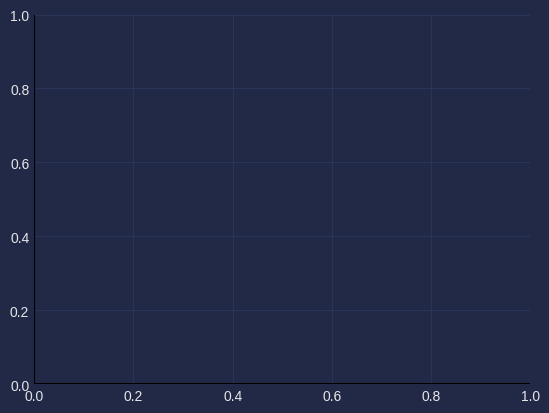

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)
plt.minorticks_on()
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#Calculating

In [ ]:
def f(x: float) -> float:
  return (x - 1)**.5 * (3*x + 2) / (4 * x**2)

def f1(x: float) -> float:
    return -(3 * x**2 - 8) / (8 * (x - 1)**.5 * x**3)

def f2(x: float) -> float:
    return (x - 1)**.5 * (9 * x**3 - 6 * x**2 - 56 * x + 48) /\
     (16 * x**6 - 32 * x**5 + 16 * x**4)

def f3(x: float) -> float:
    return -(45 * x**4 - 60 * x**3 - 480 * x**2 + 864 * x - 384) /\
     ((x - 1)**.5 * (32 * x**7 - 64 * x**6 + 32 * x**5))

def calc(a: float, b: float, N: int, f: Callable[[float], float] = f) \
-> list[(float, float)]:
  h = (b - a) / N
  x = a
  points = []
  while x <= b:
    y = f(x)
    points.append((x, y))
    x += h
  return points

def dif1_1(a: float, b: float, N: int, f: Callable[[float], float] = f) \
-> list[(float, float)]:
  h = (b - a) / N
  x = a
  points = []
  while x <= b:
    y = (f(x + h) - f(x)) / h
    points.append((x, y))
    x += h
  return points

def dif1_1_l(a: float, b: float, N: int, f: Callable[[float], float] = f) \
-> list[(float, float)]:
  h = (b - a) / N
  x = a + h
  points = []
  while x <= b:
    y = (f(x) - f(x - h)) / h
    points.append((x, y))
    x += h
  return points

def dif1_2(a: float, b: float, N: int, f: Callable[[float], float] = f) \
-> list[(float, float)]:
  h = (b - a) / N
  x = a + h
  points = []
  while x <= b:
    y = (f(x + h) - f(x - h)) / (2*h)
    points.append((x, y))
    x += h
  return points

def dif2_2(a: float, b: float, N: int, f: Callable[[float], float] = f) \
-> list[(float, float)]:
  h = (b - a) / N
  x = a + h
  points = []
  while x <= b:
    y = (f(x + h) - 2*f(x) + f(x - h)) / (h**2)
    points.append((x, y))
    x += h
  return points

def dif3_2(a: float, b: float, N: int, f: Callable[[float], float] = f) \
-> list[(float, float)]:
  h = (b - a) / N
  x = a + 2*h
  points = []
  while x <= b:
    y = (f(x + 2*h) - 2*f(x + h) + 2*f(x - h) - f(x - 2*h)) / (2 * h**3)
    points.append((x, y))
    x += h
  return points

def points_to_lists(points: list[float, float]) -> tuple[list[float], list[float]]:
  left = []; right = []
  for (x, y) in points:
    left.append(x)
    right.append(y)
  return (left, right)

# Calculated values

In [ ]:
a = 1.01; b = 1.5; N = 10

N2 = 2*N
N4 = 4*N
# N = N2

# ...
f_points = calc(a, b, N)
(f_x, f_y) = points_to_lists(f_points)

dif1_1_points = dif1_1(a, b, N)
(dif1_1_x, dif1_1_y) = points_to_lists(dif1_1_points)

dif1_1_points_l = dif1_1_l(a, b, N)
(dif1_1_l_x, dif1_1_l_y) = points_to_lists(dif1_1_points)

dif1_2_points = dif1_2(a, b, N)
(dif1_2_x, dif1_2_y) = points_to_lists(dif1_2_points)

dif2_2_points = dif2_2(a, b, N)
(dif2_2_x, dif2_2_y) = points_to_lists(dif2_2_points)

dif3_2_points = dif3_2(a, b, N)
(dif3_2_x, dif3_2_y) = points_to_lists(dif3_2_points)

# ANALYTICAL
f1_analytic_points = calc(a, b, N, f1)
(dif1_analytic_x, dif1_analytic_y) = points_to_lists(f1_analytic_points)

f2_analytic_points = calc(a, b, N, f2)
(dif2_analytic_x, dif2_analytic_y) = points_to_lists(f2_analytic_points)

f3_analytic_points = calc(a, b, N, f3)
(dif3_analytic_x, dif3_analytic_y) = points_to_lists(f3_analytic_points)

# Display

## 1.

### a)

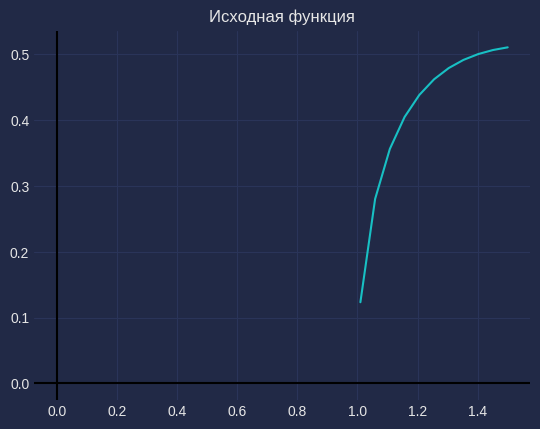

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Исходная функция')
ax.plot(f_x, f_y)

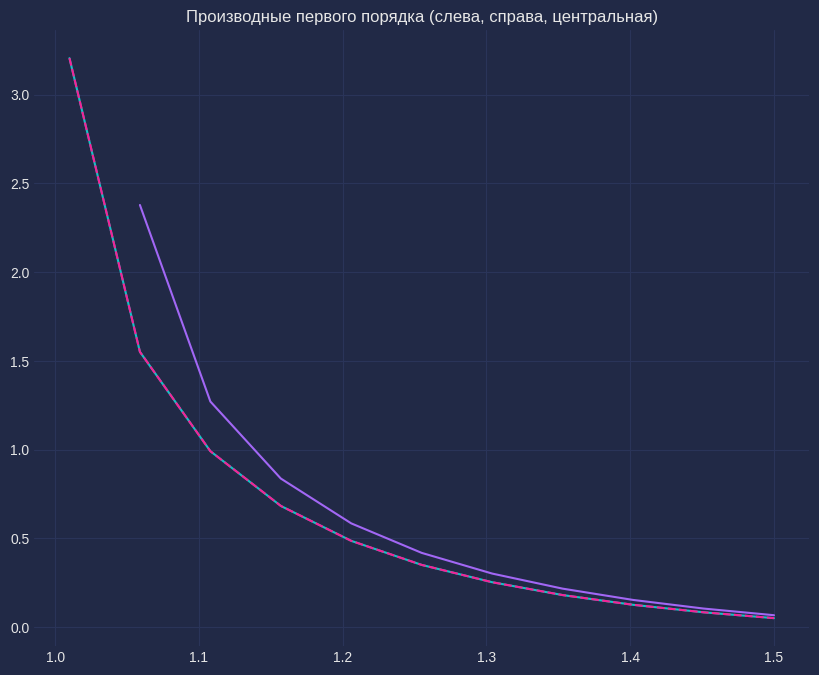

In [ ]:
# все на одном графике

fix, ax = plt.subplots(figsize=(10,8))

ax.set_title('Производные первого порядка (слева, справа, центральная)')

# синяя правая
# красная левая
ax.plot(
    dif1_1_x, dif1_1_y, "-",
    dif1_1_l_x, dif1_1_l_y, "--",
    dif1_2_x, dif1_2_y
)

### б)

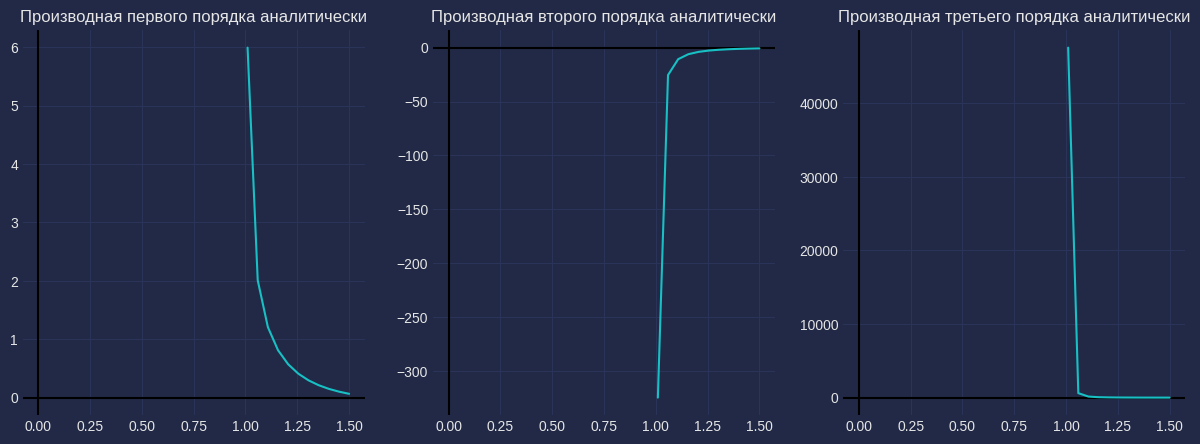

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax in axs:
  ax.axhline(0, color='black')
  ax.axvline(0, color='black')
axs[0].set_title('Производная первого порядка аналитически')
axs[1].set_title('Производная второго порядка аналитически')
axs[2].set_title('Производная третьего порядка аналитически')
axs[0].plot(dif1_analytic_x, dif1_analytic_y)
axs[1].plot(dif2_analytic_x, dif2_analytic_y)
axs[2].plot(dif3_analytic_x, dif3_analytic_y)

### в)

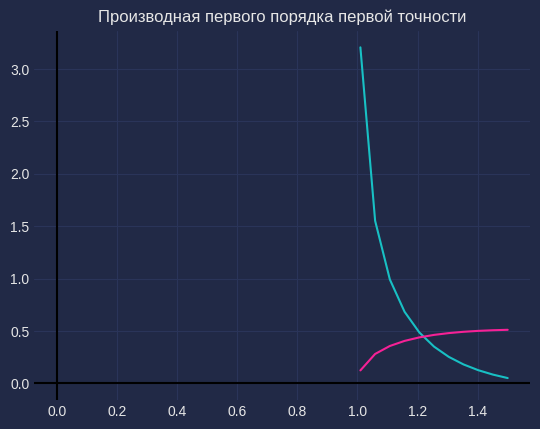

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Производная первого порядка первой точности')
# фиолетовая исходная
# синяя производная
ax.plot(dif1_1_x, dif1_1_y,
        f_x, f_y)

### г)

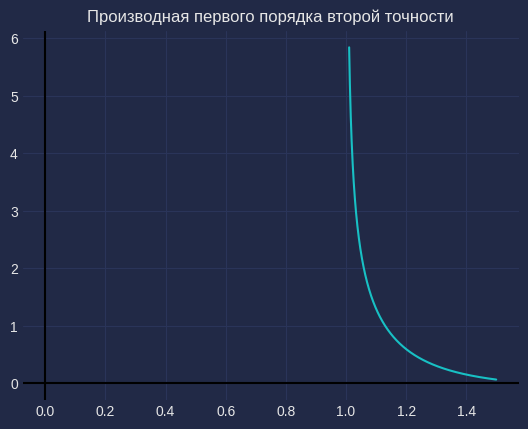

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Производная первого порядка второй точности')
ax.plot(dif1_2_x, dif1_2_y)

### д)

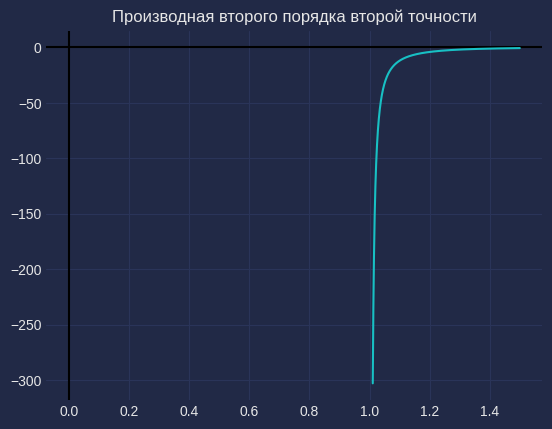

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Производная второго порядка второй точности')
ax.plot(dif2_2_x, dif2_2_y)

### e)

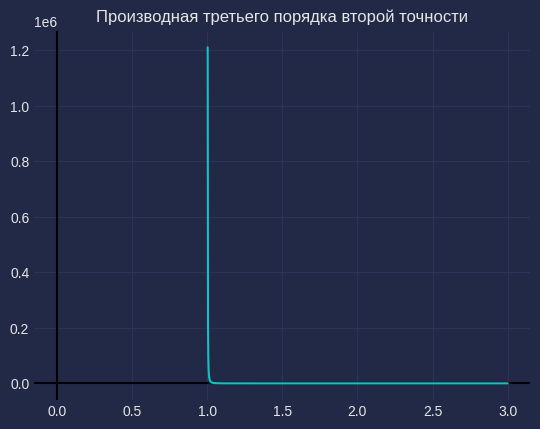

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Производная третьего порядка второй точности')
ax.plot(dif3_2_x, dif3_2_y)

## 4.

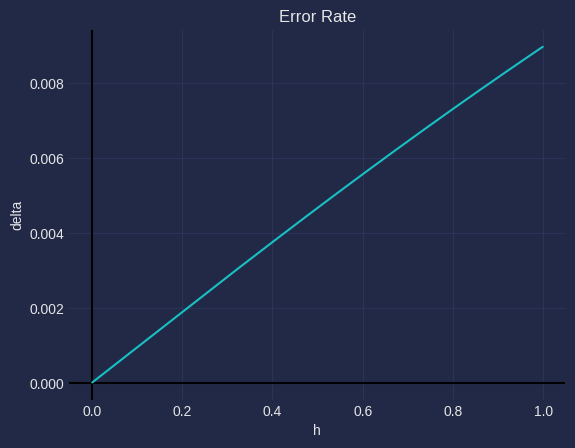

In [ ]:
x_point = 3

def err_rate(x_point, a, b, err, ref):
  points = []
  h = a
  eps = 1e-3
  while h <= b:
    y = abs(ref(x_point) - err(x_point, h))
    points.append((h, y))
    h += eps
  return points


def err(x, h):
  points = []
  y = (f(x + h) - f(x)) / h
  points.append((x, y))
  return y

points = err_rate(x_point, .001, 1, err, f1)
(x, y) = points_to_lists(points)

fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Error Rate')
ax.set_xlabel('h')
ax.set_ylabel('delta')
ax.plot(x, y)